<a href="https://colab.research.google.com/github/mariamamgad8/ML-project/blob/main/Kernelization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries**

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import seaborn as sns


## **Prepare Data**

In [2]:
# Load the dataset
data = pd.read_csv("/content/Cancer_Data.csv")

# Preprocessing
# Assuming the 'diagnosis' column is the label column
# Convert the labels to numeric (e.g., M -> 1, B -> 0)
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

# Select first 150 rows
data = data.iloc[:150]

# Features and labels
X = data.drop(columns=['diagnosis', 'id', 'Unnamed: 32'])  # Drop non-feature columns
y = data['diagnosis']

# Normalize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA for dimensionality reduction to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# **Polynomial Kernel**

Accuracy with Polynomial Kernel (Degree 2): 0.9333333333333333


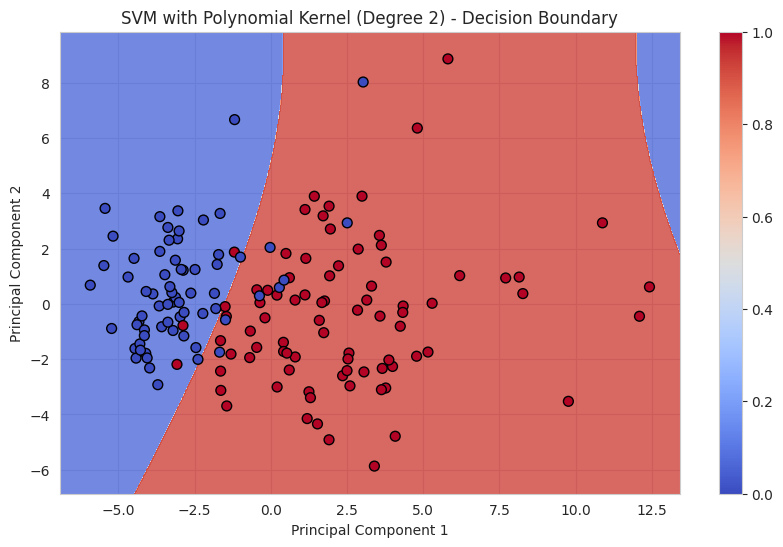

In [3]:
# Initialize and train the SVM with Polynomial kernel (degree 2)
svm_poly = SVC(kernel='poly', degree=2, coef0=1, gamma='scale')  # 'coef0' is the intercept term
svm_poly.fit(X_train, y_train)

# Make predictions
y_pred = svm_poly.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with Polynomial Kernel (Degree 2): {accuracy}")

# Visualize the decision boundary (using the first two principal components)
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Plot decision boundary
h = .02  # Step size in the mesh
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = svm_poly.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, edgecolors='k', s=50, cmap='coolwarm')
plt.title("SVM with Polynomial Kernel (Degree 2) - Decision Boundary")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar()
plt.show()


# **rbf Kernel**

Accuracy with RBF Kernel: 0.9


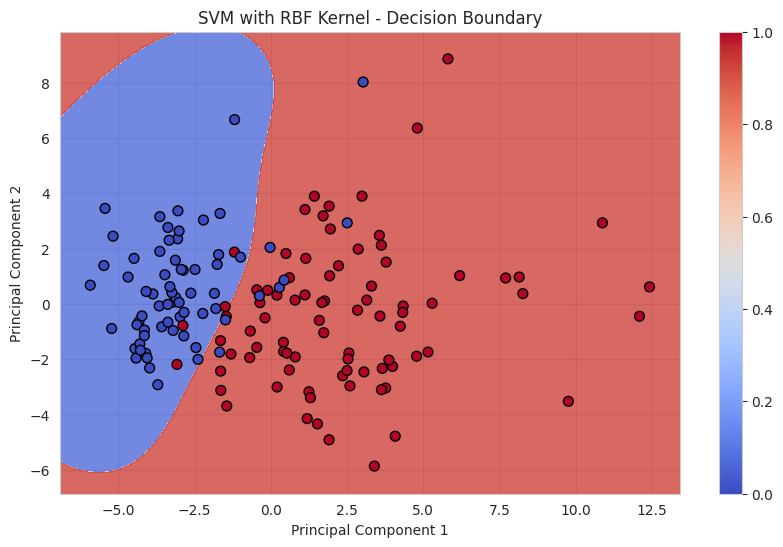

In [4]:
# Initialize and train the SVM with RBF kernel
svm_rbf = SVC(kernel='rbf', gamma='scale')  # You can tune the 'gamma' parameter
svm_rbf.fit(X_train, y_train)

# Make predictions
y_pred = svm_rbf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with RBF Kernel: {accuracy}")

# Visualize the decision boundary (using the first two principal components)
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Plot decision boundary
h = .02  # Step size in the mesh
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = svm_rbf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, edgecolors='k', s=50, cmap='coolwarm')
plt.title("SVM with RBF Kernel - Decision Boundary")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar()
plt.show()


# **quadratic kernelization**

Linear SVM (PCA features only):
Accuracy: 0.9000
Confusion Matrix:
[[ 8  2]
 [ 1 19]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.90      0.95      0.93        20

    accuracy                           0.90        30
   macro avg       0.90      0.88      0.88        30
weighted avg       0.90      0.90      0.90        30


Linear SVM with Quadratic Features:
Accuracy: 0.9000
Confusion Matrix:
[[ 8  2]
 [ 1 19]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.90      0.95      0.93        20

    accuracy                           0.90        30
   macro avg       0.90      0.88      0.88        30
weighted avg       0.90      0.90      0.90        30


SVM with Quadratic Kernel (implicit):
Accuracy: 0.9000
Confusion Matrix:
[[ 8  2]
 [ 1 19]]
Classification Report:
       

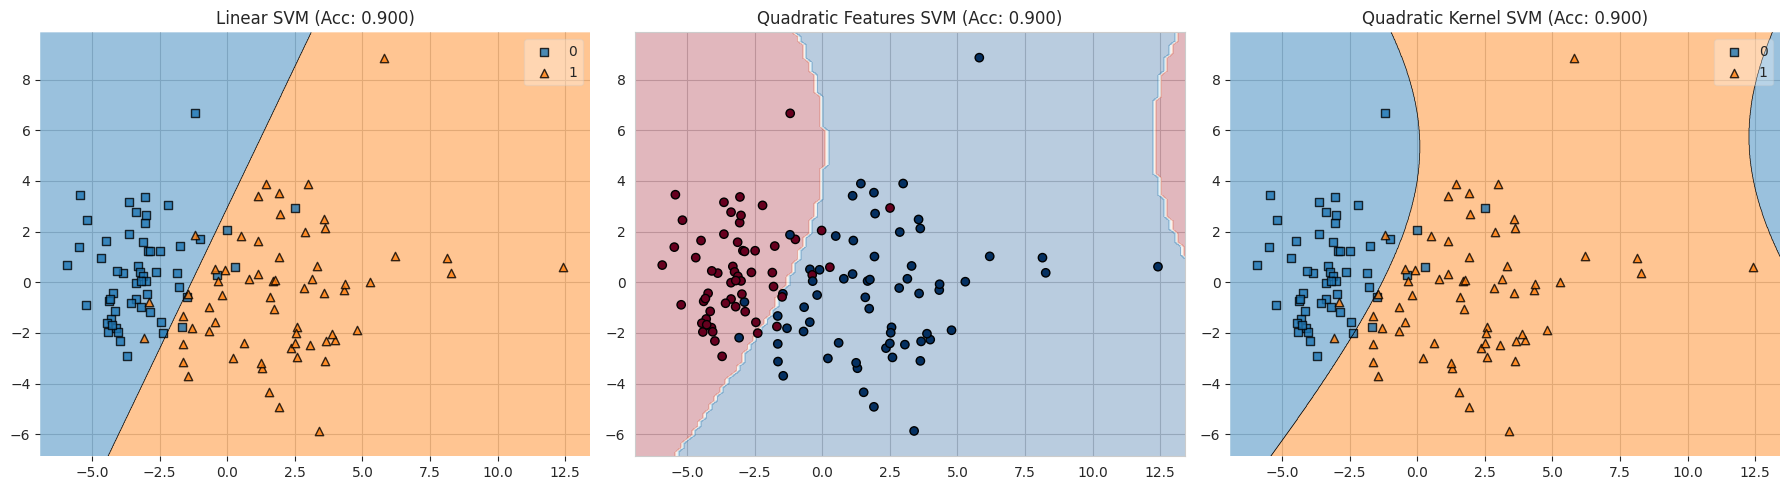

In [7]:
# Quadratic kernelization function
def quadratic_kernelization(X):
    """
    Transforms 2D input features into quadratic feature space:
    [x1², x2², √2*x1x2, √2*x1, √2*x2, 1]
    """
    x1 = X[:, 0]
    x2 = X[:, 1]

    x1_sq = x1 ** 2
    x2_sq = x2 ** 2
    x1x2 = np.sqrt(2) * x1 * x2
    x1_lin = np.sqrt(2) * x1
    x2_lin = np.sqrt(2) * x2
    bias = np.ones(X.shape[0])

    return np.column_stack([x1_sq, x2_sq, x1x2, x1_lin, x2_lin, bias])

# Apply quadratic kernelization
X_train_quad = quadratic_kernelization(X_train)
X_test_quad = quadratic_kernelization(X_test)

# Train models
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)

svm_quad = SVC(kernel='linear')
svm_quad.fit(X_train_quad, y_train)

svm_poly = SVC(kernel='poly', degree=2, coef0=1, gamma=1)
svm_poly.fit(X_train, y_train)

# Evaluation function
def evaluate_model(model, X, X_quad=None, is_quad=False):
    if is_quad:
        y_pred = model.predict(X_quad)
    else:
        y_pred = model.predict(X)
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc:.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    return acc

# Evaluate models
print("Linear SVM (PCA features only):")
acc_linear = evaluate_model(svm_linear, X_test)

print("\nLinear SVM with Quadratic Features:")
acc_quad = evaluate_model(svm_quad, X_test, X_test_quad, is_quad=True)

print("\nSVM with Quadratic Kernel (implicit):")
acc_poly = evaluate_model(svm_poly, X_test)

# Custom plotting function for quadratic features
def plot_quadratic_decision_boundary(clf, X, y, title, ax):
    # Create meshgrid in original space
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    # Transform to quadratic space and predict
    mesh_points = np.c_[xx.ravel(), yy.ravel()]
    mesh_quad = quadratic_kernelization(mesh_points)
    Z = clf.predict(mesh_quad)
    Z = Z.reshape(xx.shape)

    # Plot
    ax.contourf(xx, yy, Z, alpha=0.3, cmap='RdBu')
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap='RdBu')
    ax.set_title(title)

# Visualization
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: Linear SVM
plot_decision_regions(X_train, y_train.values, clf=svm_linear, ax=ax1)
ax1.set_title(f"Linear SVM (Acc: {acc_linear:.3f})")

# Plot 2: Quadratic Features SVM
plot_quadratic_decision_boundary(svm_quad, X_train, y_train.values,
                               f"Quadratic Features SVM (Acc: {acc_quad:.3f})", ax2)

# Plot 3: Quadratic Kernel SVM
plot_decision_regions(X_train, y_train.values, clf=svm_poly, ax=ax3)
ax3.set_title(f"Quadratic Kernel SVM (Acc: {acc_poly:.3f})")

plt.tight_layout()
plt.show()